In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import math
import warnings as wr

# House Pricing EDA & ML model

In [33]:
# readin data
train_data = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")



In [34]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
# train_data.YrSold.value_counts()
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
# Seperately store sale_price as result

Sale_Price = train_data['SalePrice']

In [37]:
print(train_data.shape)
print(Sale_Price.shape)


(1460, 81)
(1460,)


In [38]:
# Droping SalePrice from original train data set
train = train_data.drop(['SalePrice'], axis = 1)
print(train.shape)
train.head()


(1460, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [40]:
# Test data don't have SalePrice, need to use model to predict
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Preprocessing  
combining training & testing data for preposesing after that we do not write same code for test

In [45]:
# The 'keys' in concat can help us easier to identify training data and testing data
data = pd.concat([train, test], keys=['x','y'])
data = data.drop(['Id'], axis = 1)

In [48]:
data.shape


(2919, 79)

## Dealing with null values


In [75]:
## KEY, using data.isnull(), return all null, after sum, will aggregate according to each category
total_null = data.isnull().sum().sort_values(ascending=False)
null_percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
# NOTE: notice, after data.isnull(), return True/False, so count will count total item 

missing_data = pd.concat([total_null, null_percentage], axis= 1, keys=['Toal null', 'null percentage'])
missing_data.head(20)

,Toal null,null percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


### Insight from missing data
* PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage. These are all variables which presents many null values. These are not vital information. **General should not exceed 15% null percentage**  


In [98]:
#Drop All Var. with null values > 1
data = data.drop((missing_data[missing_data["null percentage"] > 0.05]).index, axis= 1) 

In [107]:
data.isnull().sum().sort_values(ascending = False)

BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
                 ..
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 68, dtype: int64

### filling null value
**Finding numeric column from data**  

**df._get_nemeric_data()** will return data that is in numeric form

In [116]:
# data._get_numeric_data()
num_col = data._get_numeric_data().columns.tolist()


### **Finding catogorical features**

In [118]:
cat_col = set(data.columns) - set(num_col)
# cat_col                          

**Filling numrical missing value with mean value**

In [120]:
for col in num_col:
#     print(col)
#     print(data[col].mean())
    data[col].fillna(data[col].mean(), inplace = True)

In [145]:
# Check no null left
# for col in num_col:
#     print(col)
#     print(data[col].isnull().sum())

**Filling catgorical missing value with mode (most occurence val)**

In [133]:
for col in cat_col:
#     print(col)
#     print(data[col].mode()[0])
    data[col].fillna(data[col].mode()[0],inplace=True)

In [146]:
# for col in cat_col:
#     print(col)
#     print(data[col].isnull().sum())

Check whether there are null left

In [136]:
data.isnull().sum().max()

0

**NOTE, drop duplicate data entries**  
To achieve, first, Transpose data, then use **drop_duplicates()**   
This will drop **duplicate column**, in this scenario will be the duplicate data entry  
then transpose back to be original df  

In [140]:
data.shape

(2919, 68)

In [141]:
# Drop 
data = data.T.drop_duplicates().T
data.shape

(2919, 68)

### Find some col has too many the same value

In [151]:
#count total value in every catgorical feature

Maj_same_val_list = []
for i in cat_col:
    print("Column name:",i)
    total = data[i].value_counts().sum()
    if data[i].value_counts().max() >= total*0.8:
        Maj_same_val_list.append(i)
        print(data[i].value_counts())

Column name: ExterQual
Column name: SaleType
WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
Column name: BsmtCond
TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Column name: Exterior1st
Column name: BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
Column name: Condition1
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Column name: Electrical
SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
Column name: ExterCond
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
Column name: Foundation
Column name: Street
Pave    2907
Grvl      12
Name: Street, dtype: int64
Column name: HeatingQC
Column name

In [150]:
Maj_same_val_list

['SaleType',
 'BsmtCond',
 'BldgType',
 'Condition1',
 'Electrical',
 'ExterCond',
 'Street',
 'PavedDrive',
 'BsmtFinType2',
 'CentralAir',
 'Functional',
 'Utilities',
 'RoofMatl',
 'SaleCondition',
 'Heating',
 'LandContour',
 'Condition2',
 'LandSlope']

In [300]:
# droping some unnecessary cat_features bcoz they have 80% + same value and 20% 
# defertnt values so they can't effect score
df=data.drop(["RoofMatl","Heating","Condition2","BsmtCond","SaleType",
                "CentralAir","Functional","Electrical","LandSlope","ExterCond","Condition1",
               "GarageArea","BsmtUnfSF","3SsnPorch","MiscVal"],axis=1) 
set(Maj_same_val_list) - set(nn)

{'BldgType',
 'BsmtFinType2',
 'LandContour',
 'PavedDrive',
 'SaleCondition',
 'Street',
 'Utilities'}

# EDA

[df.corr()](https://vimsky.com/zh-tw/examples/usage/python-pandas-dataframe-corr.html)
helps to find the correlation matrix

**NOTE: Beacues SalePrice is the target, so the features that is more correlated to SalePrice is consiedered top_corr_features**

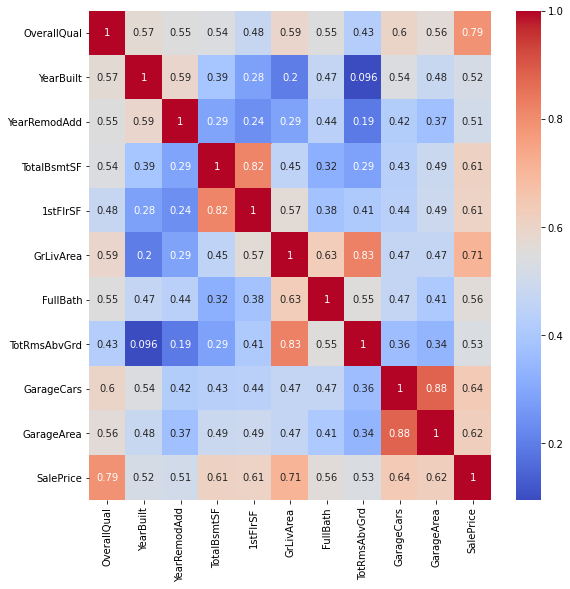

In [170]:
corrmat = train_data.corr()
# use corr to find the correlation matrix
top_corr_features = corrmat[abs(corrmat['SalePrice'] > 0.5)].index
# find the top_features
plt.figure(figsize=(9,9))
# Use these attributes to form the heatmap
# train_data[top_corr_features]
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [176]:
# All the correlation regarding to SalePRice
train_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [301]:
#droping low version feature
df=df.drop(["BldgType","Exterior1st","Exterior2nd","Foundation","BsmtFinType2","YrSold","SaleCondition","RoofStyle"],axis=1)

In [302]:
df.shape


(2919, 45)

In [229]:
df.describe()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,HouseStyle,...,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919.0,2919,2919,2919,2919,2919,2919,2919
unique,16,5,1951,2,4,4,2,5,25,8,...,14,5,7.0,3,379,252,183,121,14,12
top,20,RL,9600,Pave,Reg,Lvl,AllPub,Inside,NAmes,1Story,...,6,0,2.0,Y,0,0,0,0,0,6
freq,1079,2269,44,2907,1859,2622,2918,2133,443,1471,...,844,1420,1594.0,2641,1523,1298,2460,2663,2906,503


# Initial Guess
From above informaiton, we found some features  have an high correlation with our main variable SalePrice:

* Year Built
* TotalBsmtSF
* GrLivArea
* PoolArea

These are variables related to the conditions of the building, its age and some "extra luxury" features such as PoolArea. In principle they are all characteristics which can rise the price of an abitation. Another theory we suggested was to consider mainly the "inner" part of the house, such as KitchenQual or CentralAir, but these could be too general features which mainly all the houses can have.

Now, with these prior hypotesis, let's dive into the "SalePrice" analysis.

## [Skewness & Kurtosis](http://www.pinzhi.org/forum.php?mod=viewthread&tid=4095)
[Useful link](https://www.cnblogs.com/wyy1480/p/10474046.html)  
Kurtosis coeff: The extent of steepness. 0 means as steep as Normal distributiom, >0 means is extra steeper(leptokurtic, can determine an higher probability of outliers values. ), vice versa for <0.  
<br>
Skewness coeff: To measure the data set is skew to right or left. 0 means not skew just as Normal distrubition, >0 skew to right(longtail on the right, more outlier on the right ) ,vice versa for <0


Skewness coeff. is: 1.8828757597682129
Kurtosis coeff. is: 6.536281860064529


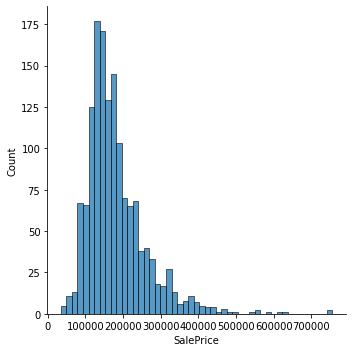

In [181]:
sns.displot(train_data['SalePrice'])
print("Skewness coeff. is: {}".format(train_data['SalePrice'].skew()))
print("Kurtosis coeff. is: {}".format(train_data['SalePrice'].kurt()))

Our distribution is highly skewed and present a longer tail on the right. The high value of kurtosis can determine an higher probability of outliers values.

## Sale Price Analysis on YearBuilt



<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

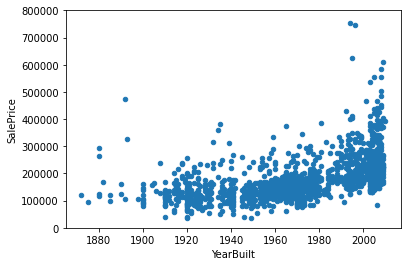

In [183]:
data_year_trend = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
data_year_trend.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000))

## Sale Price Analysis on YearBuilt


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

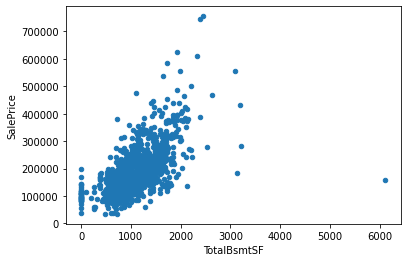

In [184]:
data_bsmt_trend = pd.concat([train_data['SalePrice'], train_data['TotalBsmtSF']],axis = 1)
data_bsmt_trend.plot.scatter(x='TotalBsmtSF', y='SalePrice')

## Sale Price Analysis on PoolArea


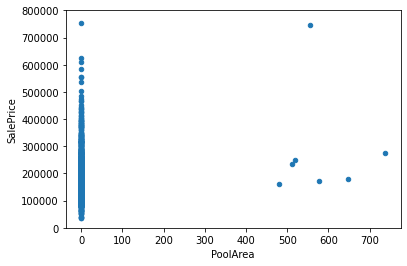

In [185]:
data_PoolArea_trend = pd.concat([train_data['SalePrice'], train_data['PoolArea']], axis=1)
data_PoolArea_trend.plot.scatter(x='PoolArea', y='SalePrice', ylim=(0,800000));

## saleprice analysis on QverallQual



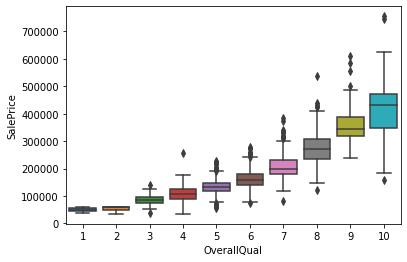

In [187]:
data_overQ = pd.concat([train_data['SalePrice'], train_data['OverallQual']], axis = 1)
fig = sns.boxplot(x='OverallQual', y='SalePrice', data = data_overQ)


## Conclusion
By these analysis

we discovered that our previsions were quite correct.

Year Built seems to have a slight relation with our main variable, and people, as we thought, tend to buy newer houses.

Instead, for TotalBsmtSF and GrLivArea there seems be a stronger relation with SalePrice.

# Outliers


In [303]:
backup_df = df

In [304]:
backup_df.shape

(2919, 45)

In [316]:
#Here we extract the numerical variables, this will come in handy later on
# df.select_dtypes(include = ["number"]).columns
# n_features = df.select_dtypes(exclude = ["object"]).columns
d_col = set(df.columns)
n_features  = d_col.intersection(num_col)


In [317]:
n_features

{'1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd'}

In [310]:
def mod_check_outlier(df):
    # num_col : numeric column for all raw data
    d_col = set(df.columns)
    columns = d_col.intersection(num_col)
    
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        higher_bound = q3 + (1.5 * iqr)
        l_outlier, h_outlier = 0 ,0
        print(col,':',higher_bound, lower_bound)
        for i in range(len(df[col])):
            if df[col][i] < lower_bound:
#                 df[col][i] = lower_bound
                l_outlier +=1
            
            if df[col][i] > higher_bound:
#                 df[col][i] = higher_bound
                h_outlier +=1
        print(l_outlier,h_outlier)
#         for col in columns:
#             df1[col] = df[col]
            
#     return(df1)
    
    

In [312]:
def mod_outlier(df):
    df1 = df.copy()
    d_col = set(df.columns)
    columns = d_col.intersection(num_col)
    
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        higher_bound = q3 + (1.5 * iqr)
        l_outlier, h_outlier = 0 ,0
        print(col,':',higher_bound, lower_bound)
        for i in range(len(df[col])):
            if df[col][i] < lower_bound:
                df[col][i] = lower_bound
                l_outlier +=1
            
            if df[col][i] > higher_bound:
                df[col][i] = higher_bound
                h_outlier +=1
        print(l_outlier,h_outlier)
        
    for col in columns:
        df1[col] = df[col]
    return df1


In [313]:
# mod_check_outlier(df)
df = mod_outlier(df)

BedroomAbvGr : 4.5 0.5
8 70
HalfBath : 2.5 -1.5
0 0
KitchenAbvGr : 1.0 1.0
3 131
1stFlrSF : 2154.75 108.75
0 42
MasVnrArea : 408.75 -245.25
0 202
TotalBsmtSF : 2065.5 29.5
78 44
LowQualFinSF : 0.0 0.0
0 40
MoSold : 14.0 -2.0
0 0
ScreenPorch : 0.0 0.0
0 256
YearRemodAdd : 2062.5 1906.5
0 0
2ndFlrSF : 1760.0 -1056.0
0 8
BsmtFinSF1 : 1832.5 -1099.5
0 15
BsmtHalfBath : 0.0 0.0
0 177
GrLivArea : 2669.75 199.75
0 74
MSSubClass : 145.0 -55.0
0 207
BsmtFullBath : 2.5 -1.5
0 2
Fireplaces : 2.5 -1.5
0 12
LotArea : 17708.0 1340.0
1 127
PoolArea : 0.0 0.0
0 13
OpenPorchSF : 175.0 -105.0
0 159
TotRmsAbvGrd : 10.0 2.0
0 51
OverallQual : 10.0 2.0
4 0
EnclosedPorch : 0.0 0.0
0 459
OverallCond : 7.5 3.5
67 185
GarageCars : 3.5 -0.5
0 17
WoodDeckSF : 420.0 -252.0
0 67
FullBath : 3.5 -0.5
0 4
BsmtFinSF2 : 0.0 0.0
0 348
YearBuilt : 2072.25 1882.25
9 0


In [315]:
print(df['BedroomAbvGr'].max())
print(df['BedroomAbvGr'].min())

4.5
0.5


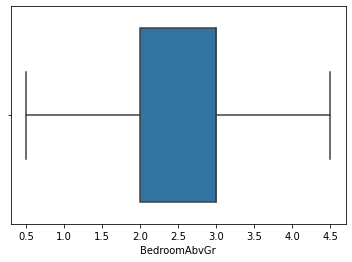

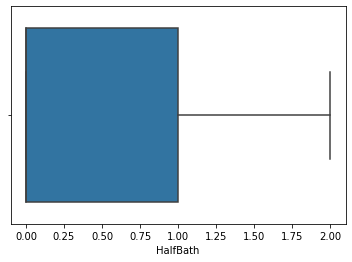

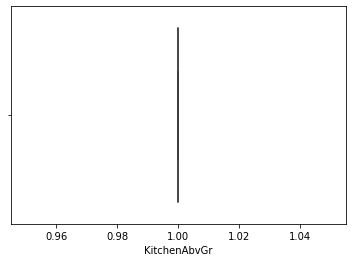

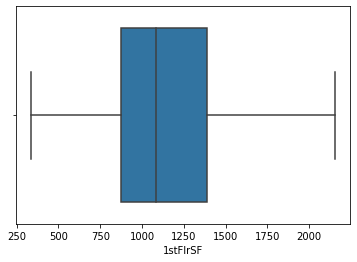

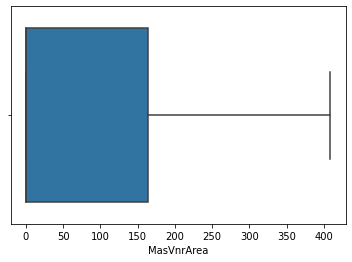

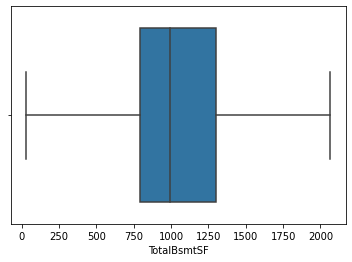

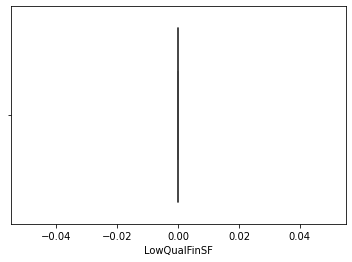

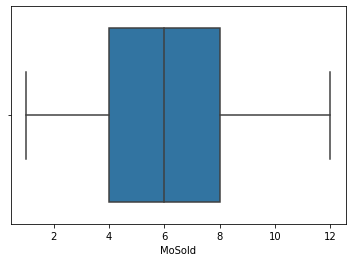

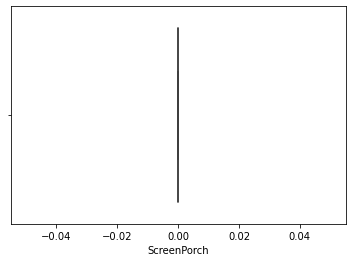

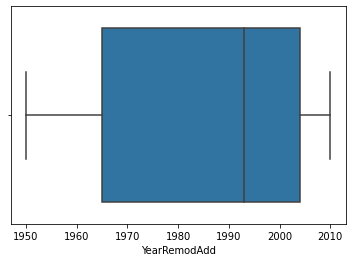

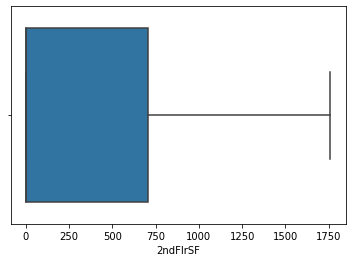

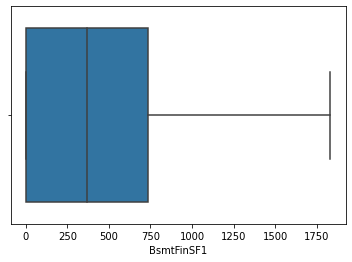

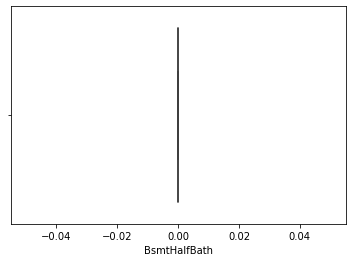

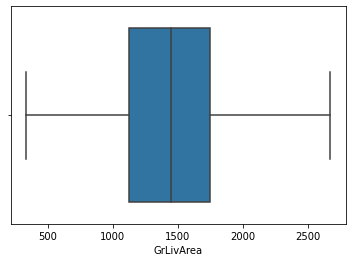

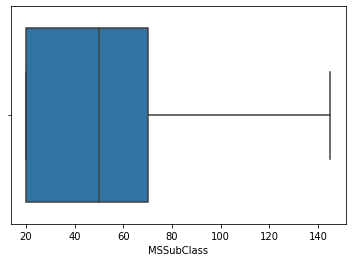

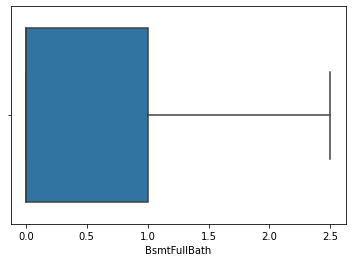

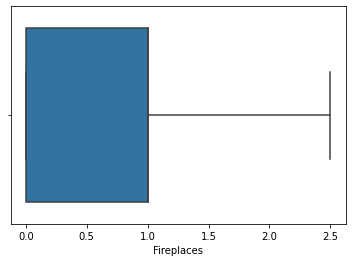

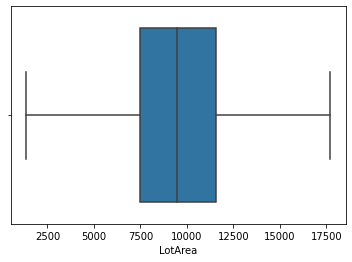

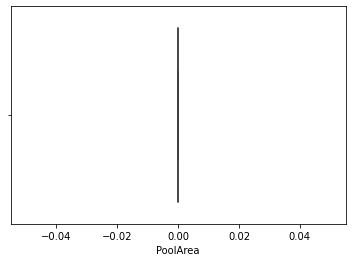

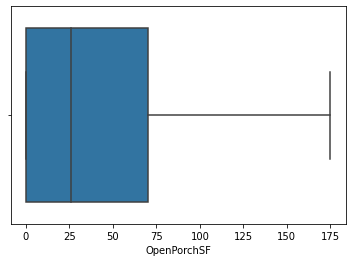

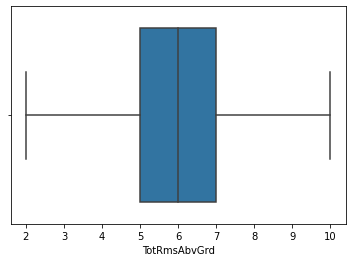

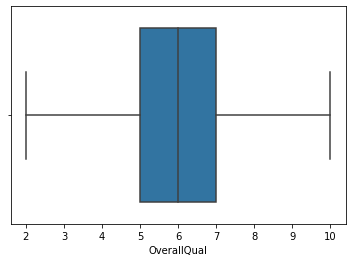

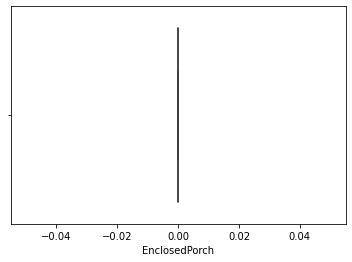

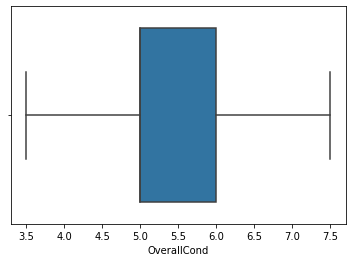

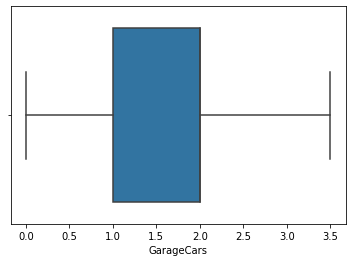

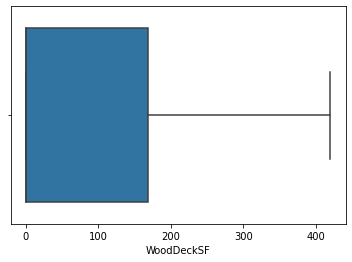

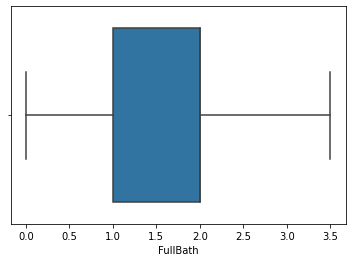

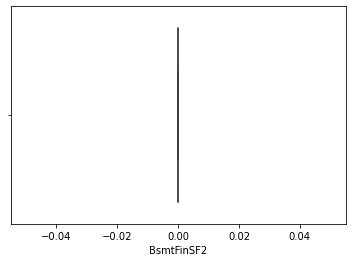

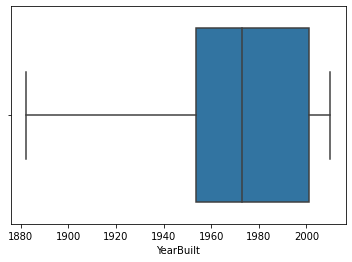

In [320]:
for i in n_features:
    sns.boxplot(x=df[i])
    plt.show()

# Model building

## here we use one hot encoading to encoad cat_features
[pd.get_dummies(df)  usage](https://blog.csdn.net/BigData_Mining/article/details/104105384)


In [322]:
X = pd.get_dummies(df)
X.shape
# X

(2919, 7856)

## here we use minmax scaler for scaling numeric fields
[MinMaxScaler usage](https://blog.csdn.net/weixin_40683253/article/details/81508321)  
MinMaxScaler：normalize to [ 0，1 ] 
<br>
MaxAbsScaler：normalize to[ -1，1 ] 

In [324]:
# set scaler
scalerX = MinMaxScaler(feature_range=(0, 1))
# update X[X.columns]
X[X.columns] = scalerX.fit_transform(X[X.columns])

In [326]:
#Training data after preproscing

Train_data=X.loc["x"]
Train_data.shape

(1460, 7856)

In [327]:
#Testing data after preproscing
Test_data=X.loc["y"]
Test_data.shape

(1459, 7856)

In [328]:
#here we add salePrice column in traning data

Train_data.insert(2,column="SalePrice",value=Sale_Price)
Train_data.head()

,MSSubClass_20.0,MSSubClass_30.0,SalePrice,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,0.0,0.0,208500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,223500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,140000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## here we split data in input(x) and output(y)

In [336]:
x = Train_data.drop(['SalePrice'], axis = 1)
y = Train_data['SalePrice']

## Model Building using train Data

In [338]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)

## [KEY: mode.score usage](https://www.kaggle.com/getting-started/27261)
you train one model logreg.train(X_train,Y_train)

the resulting model does not explain the training data 100% well (that would probably be overfitting).

if you use now the X_train to make predictions you will not get exactly Y_train, but Y_train', different somehow Y_train' = logreg.predict(X_train)

logreg.score(X_train,Y_train) is calculating the difference between Y_train and Y_train' (an accuracy measure), but you did not need to explicitly calculate Y_train'. The library does this internally.

If you try this (once the model trained with the train data):

    Y_pred = logreg.predict(X_test)

    logreg.score(X_test,Y_pred)
this score will always give 1.0

(because it compares Y_pred' (which the library calculates internally as Y_pred'= logreg.predict(X_test) ) with Y_pred; but Y_pred is also logreg.predict(X_test), because the code we wrote)

## LinearRegression

In [345]:
#Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# making prediction
y_predict = model.predict(x_test)

# Evaluating performance
score = model.score(x_test, y_test)
print(score)                         

-1059204343604144.1


## RandomForest

In [346]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 70,random_state=40,
                            min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001,
                            min_samples_split=5)

rfr.fit(x_train,y_train)

#here we can check our model score
print(rfr.score(x_test,y_test))

0.8439178123657055


rmse = root mean square error

In [348]:
y_predictrfr = rfr.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test,y_predictrfr))
print("mear squares error :",rmse)

mear squares error : 28507.280537242244


## Decision Tree

In [349]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=100, min_samples_split=5,
                            min_impurity_decrease=0.002,
                            min_weight_fraction_leaf=0.001)
dtr.fit(x_train,y_train)
y_predictdtr = dtr.predict(x_test)

#u can also use GridSearchCV / random Searchcv for hyperperameter tuning
print(dtr.score(x_test,y_test))


0.6080284927042221


In [350]:
rmse = math.sqrt(mean_squared_error(y_test, dtr.predict(x_test)))
print("RMSE:",rmse)

RMSE: 45175.853603074225


## G Boosting

In [351]:
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#RMSE estimated through the partition of the train set
GBoost.fit(x_train, y_train)

print("RMSE: %.4f" % rmse)

RMSE: 45175.8536


In [352]:
y_predictGB = GBoost.predict(x_test)
print(GBoost.score(x_test,y_test))

0.8886970793099955


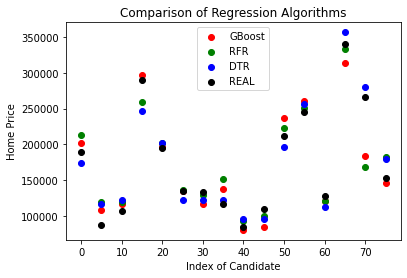

In [353]:
import numpy as np
red = plt.scatter(np.arange(0,80,5),y_predictGB[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_predictrfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_predictdtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Home Price")
plt.legend((red,green,blue,black),('GBoost', 'RFR', 'DTR', 'REAL'))
plt.show()

# Prediction On Testing Data¶


In [354]:
#here we see test data here one column is missing that is Saleprice
#bcoz that is need to predict
Test_data.head()

,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
Test_data.shape

(1459, 7856)

In [356]:
#here we predict SalePrice using RFR model
y_model_prerfc = GBoost.predict(Test_data)

In [357]:
#Here we can See predict Sale Price
y_model_prerfc=np.around(y_model_prerfc,0)
y_model_prerfc

array([119797., 144945., 169607., ..., 186546., 111704., 234345.])

In [358]:
prediction = y_model_prerfc.tolist()

In [359]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [361]:
df_prediction = pd.DataFrame()

In [365]:
df_prediction['Id'] = test['Id']
df_prediction['SalePrice'] = prediction

In [369]:
df_prediction.head()

,Id,SalePrice
0,1461,119797.0
1,1462,144945.0
2,1463,169607.0
3,1464,192811.0
4,1465,206987.0


In [370]:
df_prediction.to_csv('Home_predictionsGB.csv',index=False)